In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Image and Label and Calibration

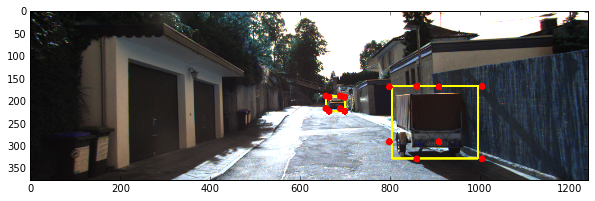

In [15]:
image = cv2.imread("/home/husky/github/autacity/2D_BB_to_3D_BB/000002.png")

for line in open("/home/husky/github/autacity/2D_BB_to_3D_BB/000002.cal").readlines():
    if 'P2:' in line:
        line = line.strip().split(' ')
        line = np.asarray([float(number) for number in line[1:]])
        cam_to_img = np.reshape(line, (3,4))

for line in open("/home/husky/github/autacity/2D_BB_to_3D_BB/000002.txt").readlines():
    line = line.strip().split(' ')
    
    # Draw 2D Bounding Box
    x_min, y_min, x_max, y_max = [int(float(number)) for number in line[4:8]]
    cv2.rectangle(image, (x_min,y_min), (x_max,y_max), (255,255,0), 3)
    
    # Draw 3D Bounding Box
    dims   = np.asarray([float(number) for number in line[8:11]])
    center = np.asarray([float(number) for number in line[11:14]])
    
    for i in [-1,1]:
        for j in [-1,1]:
            for k in [0,1]:
                point = np.copy(center)
                point[0] = center[0] + i * dims[1]/2
                point[2] = center[2] + j * dims[2]/2
                point[1] = center[1] - k * dims[0]

                point = np.append(point, 1)
                point = np.dot(cam_to_img, point)
                point = point[:2]/point[2]
                point = point.astype(np.int16)

                cv2.circle(image, (point[0],point[1]), 4, (255,0,0), 5)

fig = plt.figure(figsize=(10,10))
plt.imshow(image); plt.show()

# LIDAR Data

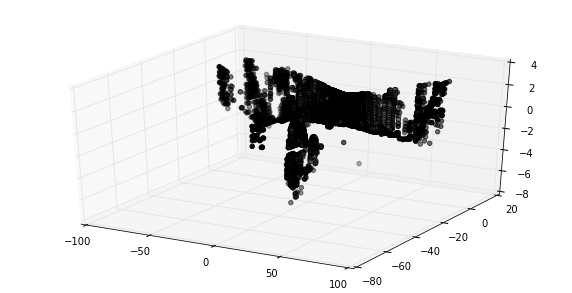

In [18]:
point_cloud = np.fromfile("/home/husky/github/autacity/2D_BB_to_3D_BB/000002.bin", dtype='float32')
point_cloud = np.reshape(point_cloud, (-1,4))

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection='3d')
skip = 1
velo_range = range(0, point_cloud.shape[0], skip)
ax.scatter(point_cloud[velo_range,0],
           point_cloud[velo_range,1],
           point_cloud[velo_range,2],
           c=point_cloud[velo_range, 3],
           cmap='gray')

plt.show()